In [1]:
import pandas as pd
%matplotlib inline
df = pd.read_excel(r'C:\Users\PICHAU\Downloads\portoes_sem_valor.xlsx')
df.dropna(inplace=True)
df.reset_index(inplace=True, drop =True)
df.describe()

,dia_semana,final_semana,noturno,capacidade,publico,publico_pagante,meia,publico_nao,receita_bruta,distancia,...,receita_liquida_real,preco_real,ano,grande,CSAxCRB,ASAxCRB,ASAxCSA,mata-mata,finalissima,portoes_fechados
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,...,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,5.272926,0.616812,0.292576,10070.414847,1967.408297,1544.148472,661.970524,399.930131,19627.717795,108.879694,...,9874.503263,12.850694,2013.300218,0.192140,0.032751,0.028384,0.029476,0.081878,0.019651,0.013100
std,1.831052,0.486429,0.455194,8954.542654,2780.762392,2319.599563,1399.297727,522.676865,46003.101228,56.877022,...,35435.688061,5.165071,2.919024,0.394198,0.178082,0.166159,0.169229,0.274328,0.138872,0.113767
min,1.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-13235.007987,0.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,3000.000000,521.000000,392.000000,102.000000,88.000000,3000.000000,71.950000,...,-1669.514281,9.104612,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,1.000000,0.000000,7000.000000,919.500000,727.000000,253.500000,195.000000,5705.000000,98.750000,...,572.222789,12.073346,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,1.000000,1.000000,12500.000000,2158.000000,1640.500000,598.500000,489.000000,15421.250000,145.000000,...,5951.201801,15.420656,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,1.000000,1.000000,28000.000000,18033.000000,16323.000000,13934.000000,4931.000000,421323.000000,238.000000,...,365224.432769,32.505693,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2]:
x = df.groupby(['fase_dummy']).preco_real.mean() #média do preço do ingresso por fase do campeonato
x
# 0 - fase de grupo | 1 - mata-mata | 2 - finalissima

fase_dummy
0    12.411386
1    15.322462
2    22.637827
Name: preco_real, dtype: float64

In [3]:
x = df.groupby(['classico']).preco_real.mean() #média do preço do ingresso por classico
x
# 0 - não classico | 1 - csaXcrb | 2 - asaXcrb | 3 - asaXcsa

classico
0    12.242151
1    22.941300
2    16.392021
3    17.003431
Name: preco_real, dtype: float64

In [4]:
x = list(df.groupby(['casa'])) #quantidade de jogos em que os clubes jogaram em casa
for i in range(len(x)):
    print(len(x[i][1]), x[i][0])

104 ASA
9 CAP
53 CEO
19 COM
10 COP
56 COR
76 CPE
91 CRB
91 CSA
83 CSE
7 DMS
10 IGA
44 IPA
5 JAC
8 MIG
98 MUR
34 PEN
16 SET
29 STA
54 STR
19 UNI


In [5]:
clubes = df.groupby(['casa']).receita_liquida_real.mean() #media da receita líquida real por jogo
publico = df.groupby(['casa']).publico_pagante.mean()
clubes.sort_values(inplace=True)
publico.sort_values(inplace=True)

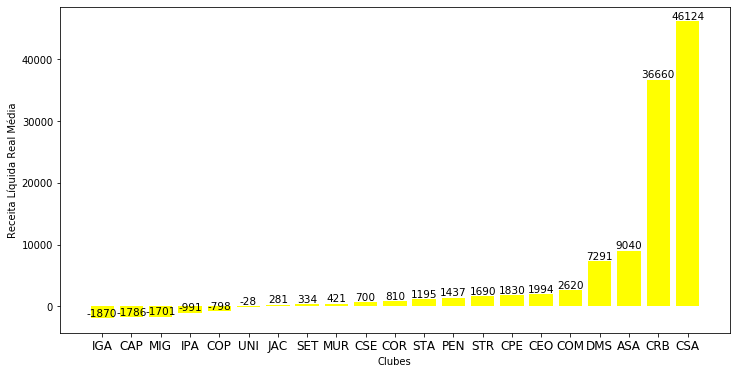

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))

bar1=plt.bar(clubes.index, clubes, width=0.8, label = 'legend', color='yellow')
plt.xticks(clubes.index, size = 12)
plt.ylabel('Receita Líquida Real Média')
plt.xlabel('Clubes')
#plt.title('Soma da Receita Real')


for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom', size = 10.5)

plt.show()


In [7]:
clubes = df.groupby(['casa']).receita_liquida_real.median() #mediana da receita líquida real por jogo
publico = df.groupby(['casa']).publico_pagante.median()
clubes.sort_values(inplace=True)
publico.sort_values(inplace=True)

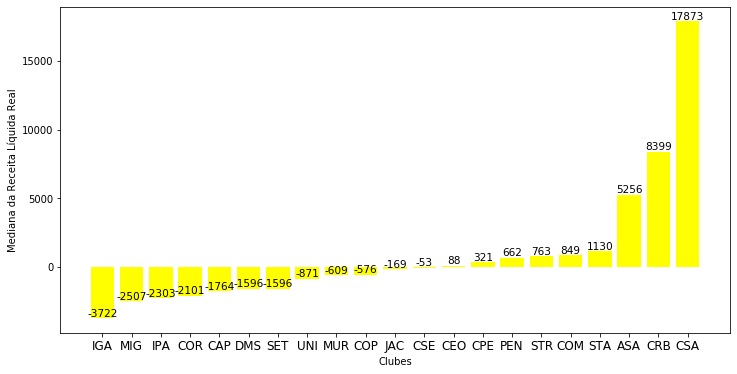

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))

bar1=plt.bar(clubes.index, clubes, width=0.8, label = 'legend', color='yellow')
plt.xticks(clubes.index, size = 12)
plt.ylabel('Mediana da Receita Líquida Real')
plt.xlabel('Clubes')
#plt.title('Soma da Receita Real')


for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom', size = 10.5)

plt.show()


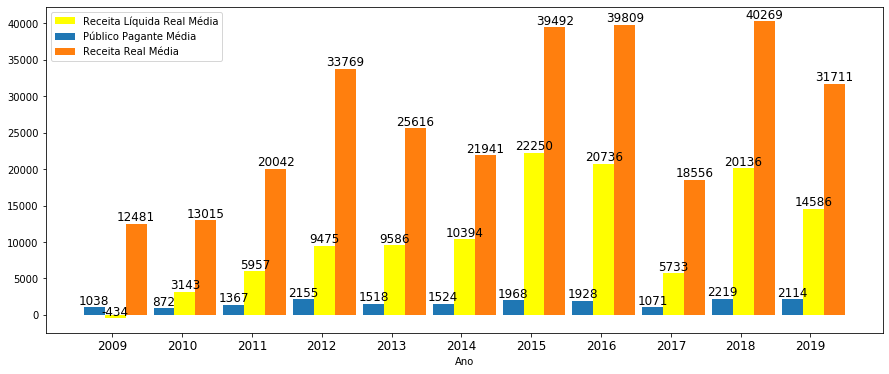

In [9]:
#receita e média de publico
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
por_ano = df.groupby(['ano']).receita_liquida_real.mean()
por_ano_publico = df.groupby(['ano']).publico_pagante.mean()
por_ano_receita = df.groupby(['ano']).receita_real.mean()


plt.figure(figsize=(15,6))

bar1=plt.bar(por_ano.index+0.04, por_ano, width=0.3, label = 'Receita Líquida Real Média', align='center', color='yellow')
bar2 = plt.bar(por_ano_publico.index-0.26, por_ano_publico, width=0.3, label = 'Público Pagante Média', align='center')
bar3 = plt.bar(por_ano_receita.index+0.34, por_ano_receita, width=0.3, label = 'Receita Real Média', align='center')
plt.xticks(por_ano.index, size = 12)
#plt.ylabel('Receita Real')
plt.xlabel('Ano')
plt.title('')


for rect in bar1 + bar2 + bar3:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom', size = 12)

plt.legend()
plt.show()

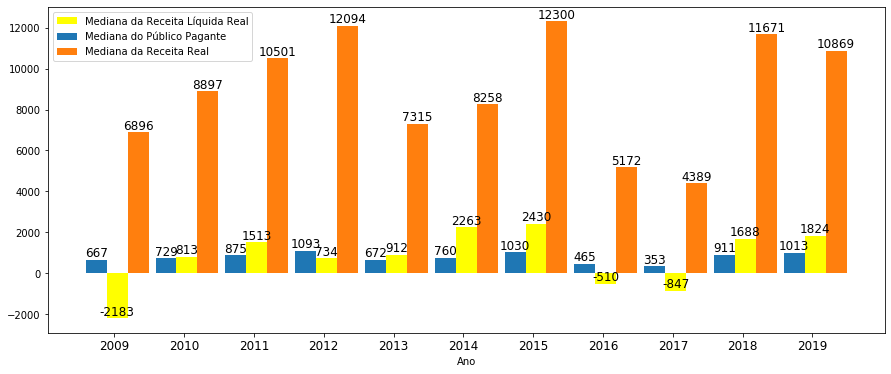

In [10]:
#receita e média de publico
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
por_ano = df.groupby(['ano']).receita_liquida_real.median()
por_ano_publico = df.groupby(['ano']).publico_pagante.median()
por_ano_receita = df.groupby(['ano']).receita_real.median()


plt.figure(figsize=(15,6))

bar1=plt.bar(por_ano.index+0.04, por_ano, width=0.3, label = 'Mediana da Receita Líquida Real', align='center', color='yellow')
bar2 = plt.bar(por_ano_publico.index-0.26, por_ano_publico, width=0.3, label = 'Mediana do Público Pagante', align='center')
bar3 = plt.bar(por_ano_receita.index+0.34, por_ano_receita, width=0.3, label = 'Mediana da Receita Real', align='center')
plt.xticks(por_ano.index, size = 12)
#plt.ylabel('Receita Real')
plt.xlabel('Ano')
plt.title('')


for rect in bar1 + bar2 + bar3:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom', size = 12)

plt.legend()
plt.show()

In [11]:
lista=[]
# listando as variáveis da dummy classico
for i in df.casa:
    if i == 'ASA':
        lista.append('ASA')
    elif i == 'CRB':
        lista.append('CRB')
    elif i == 'CSA':
        lista.append('CSA')
    else:
        lista.append('Outros')

df['Clubes Mandantes']=lista

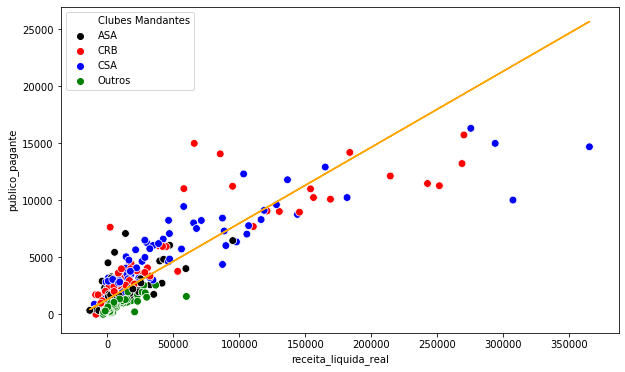

In [21]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression

X = df.receita_liquida_real.iloc[:].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df.publico.iloc[:].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 

import seaborn as sns
%matplotlib inline
cor=['black', 'red', 'blue', 'green']
plt.figure(figsize=(10,6))
#plt.scatter(X, Y)
plt.plot(X, Y_pred, color='orange')
g =sns.scatterplot(x="receita_liquida_real", y="publico_pagante",
              hue="Clubes Mandantes", s=60,
              data=df, palette=cor, legend='full', hue_order=('ASA', 'CRB', 'CSA', 'Outros'))
plt.legend()
plt.show()

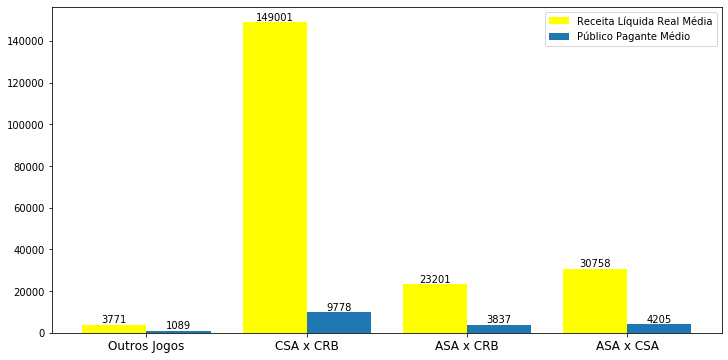

In [13]:
classico = df.groupby(['classico']).mean()

plt.figure(figsize=(12,6))
receita=plt.bar(classico.index-0.2, classico.receita_liquida_real, width=0.4, label = 'Receita Líquida Real Média', color = 'yellow')
publico=plt.bar(classico.index+0.2, classico.publico_pagante, width=0.4, label = 'Público Pagante Médio')
plt.xticks(np.arange(4), ('Outros Jogos', 'CSA x CRB', 'ASA x CRB', 'ASA x CSA'), size = 12)
plt.ylabel('')
plt.xlabel('')
#plt.title('Média da Receita Real e Média de Público')

for rect in publico + receita:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,'{:.0f}'.format(int(height)), ha='center', va='bottom')

plt.legend()
plt.show()

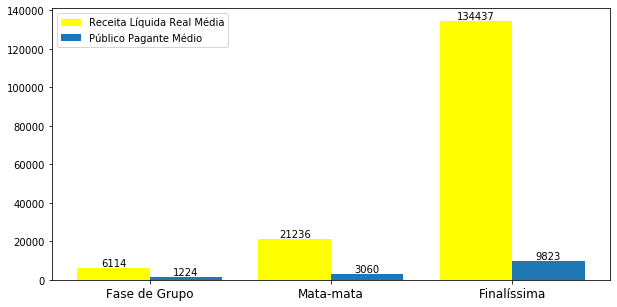

In [14]:
classico = df.groupby(['fase_dummy']).mean()

plt.figure(figsize=(10,5))
receita=plt.bar(classico.index-0.2, classico.receita_liquida_real, width=0.4, label = 'Receita Líquida Real Média',color='yellow')
publico=plt.bar(classico.index+0.2, classico.publico_pagante, width=0.4, label = 'Público Pagante Médio')
plt.xticks(np.arange(3), ('Fase de Grupo', 'Mata-mata', 'Finalíssima'), size = 12)
plt.ylabel('')
plt.xlabel('')
#plt.title('Média da Receita Real e Média de Público')

for rect in publico + receita:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,'{:.0f}'.format(int(height)), ha='center', va='bottom')

plt.legend()
plt.show()

# regressão linear

In [15]:
x=df[['preco_real','mata-mata','finalissima','CSAxCRB', 'ASAxCRB', 'ASAxCSA','portoes_fechados',
      'final_semana','distancia','noturno']]
y=df.publico_pagante


In [16]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

# modelo publico pagante

In [17]:
model.summary(title = 'Modelo publico pagante')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Modelo publico pagante                            
==============================================================================
Dep. Variable:        publico_pagante   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     160.8
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          5.73e-193
Time:                        01:04:09   Log-Likelihood:                -7929.7
No. Observations:                 916   AIC:                         1.588e+04
Df Residuals:                     905   BIC:                         1.593e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               84.4900    213.325      0.396      0.692    -334.179     503.159
preco_real          58.4721     10.856      5.386      0.000      37.166      79.778
mata-mata         1384.1801    174.779      7.920      0.000    1041.160    1727.200
finalissima       4170.0888    371.758     11.217      0.000    3440.481    4899.696
CSAxCRB           6811.3376    319.528     21.317      0.000    6184.236    7438.439
ASAxCRB           1990.6439    287.391      6.927      0.000    1426.614    2554.674
ASAxCSA           2365.1882    284.644      8.309      0.000    1806.550    2923.827
portoes_fechados -1648.6890    438.241     -3.762      0.000   -2508.775    -788.603
final_semana       242.6899    122.261      1.985      0.047       2.743     482.637
distancia           -1.0713      0.888     -1.207      0.228      -2.813       0.671
noturno            520.2928    131.156      3.967      0.000     262.888     777.698
==============================================================================
Omnibus:                      366.145   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2899.953
Skew:                           1.616   Prob(JB):                         0.00
Kurtosis:                      11.095   Cond. No.                     1.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# modelo receita liquida real

In [18]:
import statsmodels.api as sm
y = df.receita_liquida_real
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

model.summary(title = 'Modelo receita liquida real')

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Modelo receita liquida real                           
================================================================================
Dep. Variable:     receita_liquida_real   R-squared:                       0.657
Model:                              OLS   Adj. R-squared:                  0.653
Method:                   Least Squares   F-statistic:                     173.0
Date:                  Tue, 31 Aug 2021   Prob (F-statistic):          3.22e-202
Time:                          01:04:09   Log-Likelihood:                -10405.
No. Observations:                   916   AIC:                         2.083e+04
Df Residuals:                       905   BIC:                         2.089e+04
Df Model:                            10                                         
Covariance Type:              nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.048e+04   3182.727     -6.435      0.000   -2.67e+04   -1.42e+04
preco_real        1667.8180    161.972     10.297      0.000    1349.934    1985.702
mata-mata         1.039e+04   2607.642      3.984      0.000    5271.220    1.55e+04
finalissima        5.15e+04   5546.488      9.285      0.000    4.06e+04    6.24e+04
CSAxCRB           1.134e+05   4767.238     23.790      0.000    1.04e+05    1.23e+05
ASAxCRB           6373.5866   4287.763      1.486      0.138   -2041.529    1.48e+04
ASAxCSA           1.507e+04   4246.781      3.548      0.000    6732.206    2.34e+04
portoes_fechados -8548.6274   6538.391     -1.307      0.191   -2.14e+04    4283.545
final_semana       927.3947   1824.083      0.508      0.611   -2652.530    4507.320
distancia            6.9568     13.244      0.525      0.600     -19.035      32.949
noturno           5135.9209   1956.797      2.625      0.009    1295.533    8976.309
==============================================================================
Omnibus:                      614.522   Durbin-Watson:                   2.202
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28771.792
Skew:                           2.439   Prob(JB):                         0.00
Kurtosis:                      30.019   Cond. No.                     1.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# teste de multicolinearidade

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

             feature        VIF
0              const  21.279437
1         preco_real   1.468647
2          mata-mata   1.073801
3        finalissima   1.244960
4            CSAxCRB   1.512374
5            ASAxCRB   1.065113
6            ASAxCSA   1.083816
7   portoes_fechados   1.161080
8       final_semana   1.652020
9          distancia   1.190658
10           noturno   1.664837


# teste de heterocidasticidade

In [20]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 303.0971988919817),
 ('p-value', 3.4420258162749e-59),
 ('f-value', 44.75472530087199),
 ('f p-value', 2.373313171512933e-72)]